# 알고리즘 특징(KNN)
1. k의 값에 따른 성능변화
2. 별도의 학습이 필요 없다(메모리 기반 분류 알고리즘)
    
# 알고리즘 순서
1. 학습 데이터의 특징 벡터와 항목 분류명(클래스명)을 저장한다.
2. 입력 데이터의 특징 벡터와 거리가 가장 가까운 k개의 데이터를 수집한다.
3. 수집된 데이터 중 가장 큰 비율을 가진 항목으로 입력 데이터의 항목 분류명을 반환한다.

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from os.path import join
from matplotlib.colors import ListedColormap
from sklearn import neighbors , datasets
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

# 1. 데이터 보기

In [322]:
datapath = join('data','abalone.txt')
labelpath = join('data','abalone_attributes.txt')

#txt파일 읽기
columns = list()
with open(labelpath, 'r') as f:
    columns = f.read().split('\n')
    
# cloumns = attribute    
abalone = pd.read_csv(datapath, names = columns)

abalone_M = abalone.loc[abalone['Sex'] == 'M']
abalone_F = abalone.loc[abalone['Sex'] == 'F']
abalone_I = abalone.loc[abalone['Sex'] == 'I']

y = abalone['Sex']
X = abalone

del X['Sex']
X     

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
7,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
8,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
9,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.3200,19


# 1.1 각 데이터에 대해 종류별로 Boxplot

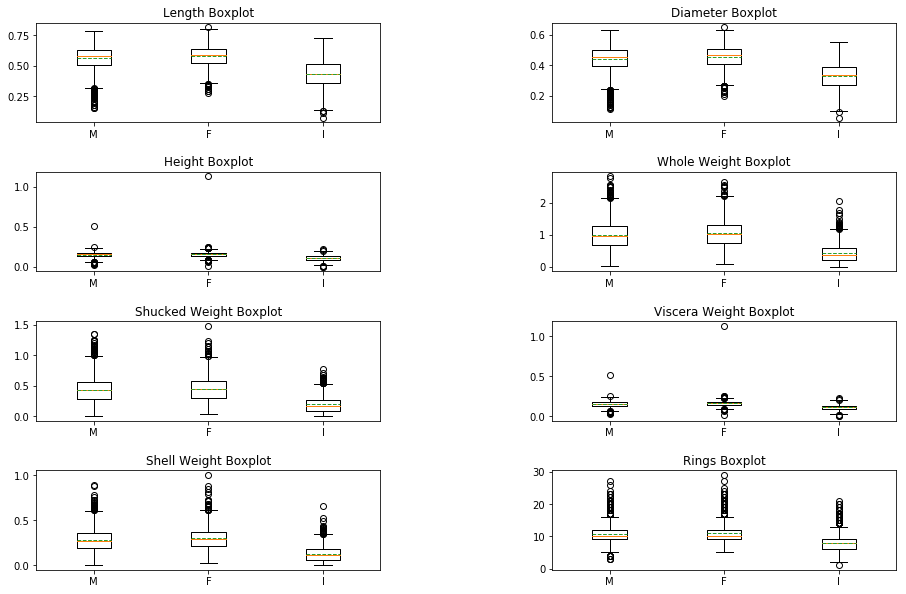

In [323]:
fig, axs = plt.subplots(4,2)

#Length
axs[0, 0].boxplot([abalone_M['Length'], abalone_F['Length'], abalone_I['Length']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[0, 0].set_title('Length Boxplot')

#Diameter
axs[0, 1].boxplot([abalone_M['Diameter'], abalone_F['Diameter'], abalone_I['Diameter']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[0, 1].set_title('Diameter Boxplot')

#Height
axs[1, 0].boxplot([abalone_M['Height'], abalone_F['Height'], abalone_I['Height']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[1, 0].set_title('Height Boxplot')

#Whole Weight
axs[1, 1].boxplot([abalone_M['Whole weight'], abalone_F['Whole weight'], abalone_I['Whole weight']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[1, 1].set_title('Whole Weight Boxplot')

#Shucked Weight
axs[2, 0].boxplot([abalone_M['Shucked weight'], abalone_F['Shucked weight'], abalone_I['Shucked weight']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[2, 0].set_title('Shucked Weight Boxplot')

#Viscera Weight
axs[2, 1].boxplot([abalone_M['Height'], abalone_F['Height'], abalone_I['Height']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[2, 1].set_title('Viscera Weight Boxplot')

#Shell Weight
axs[3, 0].boxplot([abalone_M['Shell weight'], abalone_F['Shell weight'], abalone_I['Shell weight']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[3, 0].set_title('Shell Weight Boxplot')

#Rings
axs[3, 1].boxplot([abalone_M['Rings'], abalone_F['Rings'], abalone_I['Rings']],
           labels = ['M', 'F', 'I'],
           meanline = True,
           showmeans = True)
axs[3, 1].set_title('Rings Boxplot')

fig.subplots_adjust(left = 0.01, right = 2, bottom = 0.1, top = 2, hspace = 0.5, wspace = 0.5)

plt.show()

# 2. 간단한 전처리

In [334]:
np_abalone = np.array(abalone)
X_train, X_test, Y_train, Y_test = train_test_split( X, y, test_size=0.3, random_state = 1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #변수들의 척도(Scale)가 서로 다를 경우에 상호 비교를 위해서 표준화하는 방법
scaler.fit(X_train)
trnx_scale = scaler.transform(X_train)
tstx_scale = scaler.transform(X_test)


c:\users\s\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


# 3. 모델에 적용

## 3.1 KNN

In [336]:
# k 값을 의미하는 변수
n_neighbors = 15

clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(X_train, Y_train)

print("uniform  학습 세트 정확도  : {:.3f}%".format(clf.score(X_train, Y_train) * 100))
print("uniform  테스트 세트 정확도: {:.3f}%".format(clf.score(X_test, Y_test) * 100))

uniform  학습 세트 정확도  : 61.453%
uniform  테스트 세트 정확도: 53.146%


In [337]:
clf2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf2.fit(X_train, Y_train)


print("distance 학습 세트 정확도  : {:.3f}%".format(clf2.score(X_train, Y_train) * 100))
print("distance 테스트 세트 정확도: {:.3f}%".format(clf2.score(X_test, Y_test) * 100))

distance 학습 세트 정확도  : 100.000%
distance 테스트 세트 정확도: 52.599%


## 3.2 Decision Tree

In [338]:
estimator = DecisionTreeClassifier()
estimator.fit(X_train, Y_train)
print("학습 세트 정확도: {:.3f}%".format(estimator.score(X_train, Y_train) * 100))
print("테스트 세트 정확도: {:.3f}%".format(estimator.score(X_test, Y_test) * 100))
print("특성 중요도:\n{}".format(estimator.feature_importances_))

학습 세트 정확도: 100.000%
테스트 세트 정확도: 49.863%
특성 중요도:
[0.09589175 0.08029253 0.06360122 0.1363717  0.0905872  0.32565574
 0.13274196 0.0748579 ]


### 가지치기

In [339]:
estimator = DecisionTreeClassifier(criterion = 'entropy',
                                   max_depth = None,
                                   max_leaf_nodes = None,
                                  )
estimator.fit(X_train, Y_train)
print("학습 세트 정확도: {:.3f}".format(estimator.score(X_train, Y_train)))
print("테스트 세트 정확도: {:.3f}".format(estimator.score(X_test, Y_test)))

학습 세트 정확도: 1.000
테스트 세트 정확도: 0.499
